# 1D flow and solute transport

In [9]:
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft
import glob
from natsort import natsorted
from scipy.special import erfc

Find Tecplot point files in current directory

## Plot breakthrough curve

The observation point is located at midpoint of the column.

In [10]:
filenames_1 = glob.glob("./2b-1*.pft")
filenames_2 = glob.glob("./2b-2*.pft")
# filenames = natsorted(filenames)

In [11]:
# filenames = ['./1D_vsat_flow_pulse_2layer-obs-0.pft'] #!MODIFY this if your observation file name is different.

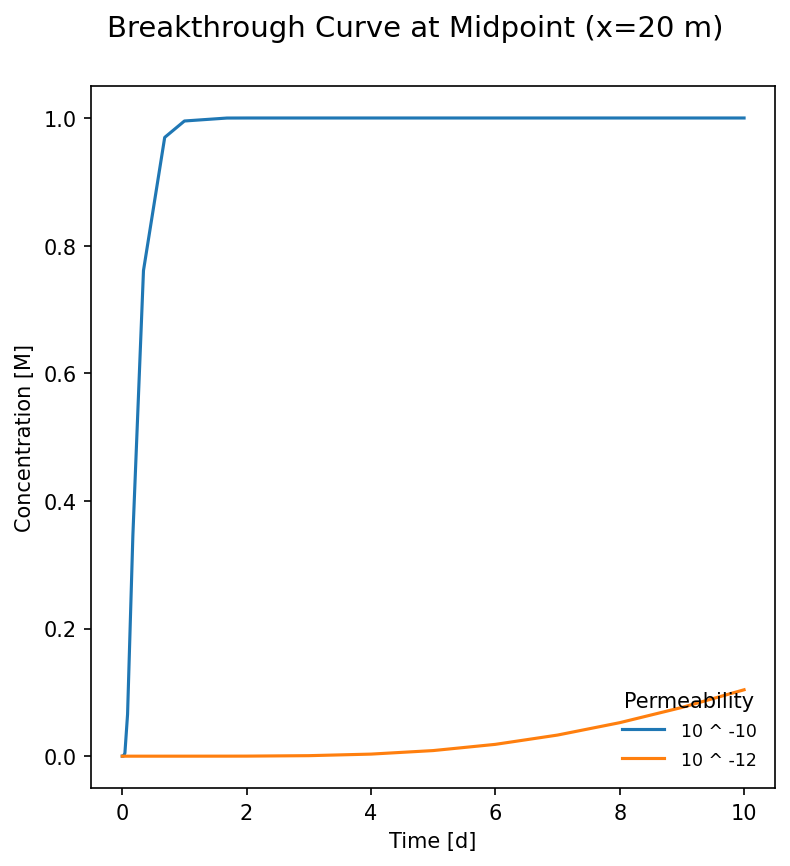

In [12]:
f = plt.figure(figsize=(6,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("Breakthrough Curve at Midpoint (x=20 m)",fontsize=14)
plt.xlabel('Time [d]')
plt.ylabel('Concentration [M]')

# select the column index in the observation file
column_index = 4 #!MODIFY this if your variable is different
data = pft.Dataset(filenames_1[0],1,column_index)
plt.plot(data.get_array('x'),data.get_array('y'),label='10 ^ -10')
data = pft.Dataset(filenames_2[0],1,column_index)
plt.plot(data.get_array('x'),data.get_array('y'),label='10 ^ -12')

plt.legend(loc="lower right",title='Permeability')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.14,right=.9)

plt.show()